<a href="https://colab.research.google.com/github/raulbenitez/PRML_exploratory_analysis/blob/main/SOLUTION_PRML_P12_clustering_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRML Session P1.2 CLUSTERING ALGORITHMS

## Task 1: Apply k-means, agglomerative and GMM clustering methods to the Artantica Penguin's database and compare the results

https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

Load dataset

In [1]:
import seaborn as sns
df = sns.load_dataset('penguins') # load data
df1 = df.dropna() # remove nans
df1.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Remove non-numerical columns and NaNs

In [2]:
df2 = df1.drop(columns=['species', 'island','sex']) # remove non-numerical variables
df2.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


Visualize numerical data

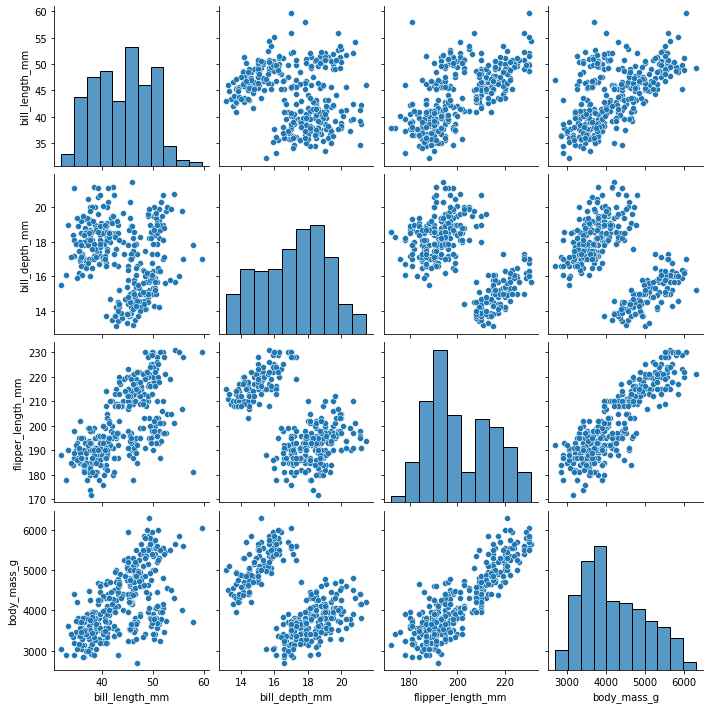

In [3]:
sns.pairplot(df2)

Compare k-means, agglomerative and GMM using Adjusted Rand Index

In [8]:
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score

kmeans_clust = KMeans(n_clusters=3).fit_predict(df2)
gmm_clust = mixture.GaussianMixture(n_components=2,covariance_type='full').fit_predict(df2)
agglo_clust = AgglomerativeClustering(n_clusters=3).fit_predict(df2)

rand_kmeans_sex = rand_score(df1['sex'].values,kmeans_clust)
rand_kmeans_species = rand_score(df1['species'].values,kmeans_clust)
rand_kmeans_island = rand_score(df1['island'].values,kmeans_clust)

rand_agglo_sex = rand_score(df1['sex'].values,agglo_clust)
rand_agglo_species = rand_score(df1['species'].values,agglo_clust)
rand_agglo_island = rand_score(df1['island'].values,agglo_clust)

rand_gmm_sex = rand_score(df1['sex'].values,gmm_clust)
rand_gmm_species = rand_score(df1['species'].values,gmm_clust)
rand_gmm_island = rand_score(df1['island'].values,gmm_clust)

print('SEX SCORE: kmeans = {}, agglo = {}, gmm ={}'.format(rand_kmeans_sex,rand_agglo_sex,rand_gmm_sex))
print('SPECIES SCORE: kmeans = {}, agglo = {}, gmm ={}'.format(rand_kmeans_species,rand_agglo_species,rand_gmm_species))
print('ISLAND SCORE: kmeans = {}, agglo = {}, gmm ={}'.format(rand_kmeans_island,rand_agglo_island,rand_gmm_island))


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SEX SCORE: kmeans = 0.5452802199790152, agglo = 0.5601505119577409, gmm =0.49853467925757083
SPECIES SCORE: kmeans = 0.6854082998661312, agglo = 0.7261116538224972, gmm =0.820398711964977
ISLAND SCORE: kmeans = 0.5992076413763161, agglo = 0.6506205000180904, gmm =0.6653822497195991


- Best similarity between clustering and SEX is obtained with the Agglomerative clustering algorithm
- Best similarity between clustering and SPECIES is obtained with the GMM clustering algorithm
- Best similarity between clustering and ISLAND is obtained with the GMM clustering algorithm


## Task 2: Object segmentation using clustering 

- step 1: Load an Image and visualize
- step 2: Convert to grayscale 
- step 3: Reshape image matrix as 1d array
- step 4 (exercise): Apply k-means  
- step 5 (exercise): Reshape result back as a matrix and visualize
- Step 6 (exercise): Compare k-means (k=2) and Otsu segmentation

Step 1: Load image and visualize

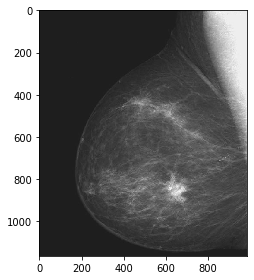

In [12]:
import skimage as sk # load skimage libraries
from skimage import io 
IC = sk.io.imread('image1.tif') # read image using imread function
sk.io.imshow(IC) # visualize image using imshow function
sk.io.show() 

Step 2: Convert to grayscale

The image is already grasycale

Step 3: Reshape image as 1d array

In [16]:
# reshape the image as 1d array:
v = IC.reshape(IC.shape[0]*IC.shape[1],1)
v.shape

(1145376, 1)

Step 4 (exercise):

In [17]:
from sklearn.cluster import KMeans

kmeans_group = KMeans(n_clusters=2).fit_predict(v)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Step 5 (exercise): 

In [19]:
import numpy as np 
I_kmeans = np.reshape(kmeans_group,(IC.shape[0],IC.shape[1]))

Step 6 (exercise): Compare k-means result with k=2 with Otsu segmentation

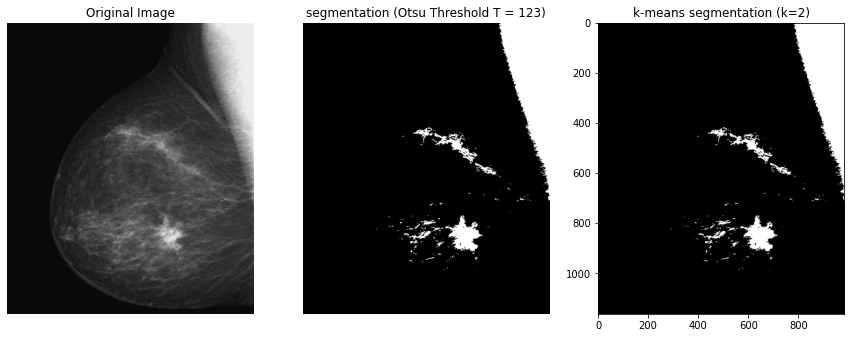

In [23]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from skimage.filters import threshold_otsu

# Find Otsu's threshold for training image:
threshold_otsu = threshold_otsu(IC)

# Apply threshold to test image:
I_otsu = IC >= threshold_otsu

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(1, 3)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(IC, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_otsu, cmap=plt.cm.gray)
ax2.set_title('segmentation (Otsu Threshold T = {})'.format(threshold_otsu))
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[0,2])
ax3.imshow(I_kmeans, cmap=plt.cm.gray)
ax3.set_title('k-means segmentation (k=2)')
plt.show()

Otsu and k-means with k=2 are nearly identical

In [25]:
rand_kmeans_otsu = rand_score(kmeans_group,I_otsu.ravel())
print(rand_kmeans_otsu)

0.9977378041180737


## Task 3: Segmentation of color images using GMM + BIC

Write a code to segment the astronaut skimage image using a Gaussian Mixture Model clustering algorithm. Select the optimal number of gaussian components using a BIC model selection strategy. 


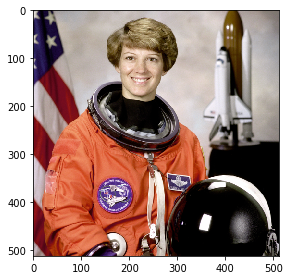

M = 512 columns, N = 512 rows, NC = 3 color channels


In [28]:
import skimage as sk # load skimage libraries
IC = sk.data.astronaut() # load a color image from the skimage built-in dataset
sk.io.imshow(IC) # visualize image using imshow function
sk.io.show() 
print('M = {} columns, N = {} rows, NC = {} color channels'.format(*IC.shape)) # Print out image siz

In [29]:
from sklearn.datasets import make_blobs
from sklearn import mixture

v_I = np.reshape(IC,(IC.shape[0]*IC.shape[1],IC.shape[2])) # reshape image as NPIX x NCHANNELS array

NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(v_I)
    bic.append(gmm.bic(v_I))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm_win = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(v_I)



[8019969.219591582]
[8019969.219591582, 7627407.5920031695]
[8019969.219591582, 7627407.5920031695, 6352782.44307237]
[8019969.219591582, 7627407.5920031695, 6352782.44307237, 6108981.977368573]
[8019969.219591582, 7627407.5920031695, 6352782.44307237, 6108981.977368573, 5696038.878717007]
[8019969.219591582, 7627407.5920031695, 6352782.44307237, 6108981.977368573, 5696038.878717007, 5592440.463288712]
[8019969.219591582, 7627407.5920031695, 6352782.44307237, 6108981.977368573, 5696038.878717007, 5592440.463288712, 5569018.877344426]
[8019969.219591582, 7627407.5920031695, 6352782.44307237, 6108981.977368573, 5696038.878717007, 5592440.463288712, 5569018.877344426, 5498764.115177227]
[8019969.219591582, 7627407.5920031695, 6352782.44307237, 6108981.977368573, 5696038.878717007, 5592440.463288712, 5569018.877344426, 5498764.115177227, 5468222.342136843]
[8019969.219591582, 7627407.5920031695, 6352782.44307237, 6108981.977368573, 5696038.878717007, 5592440.463288712, 5569018.877344426, 5

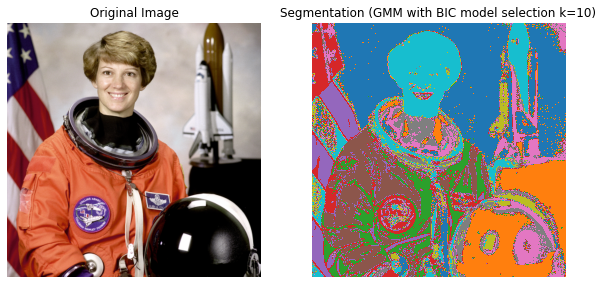

In [31]:
v_gmm = gmm_win.fit_predict(v_I) # Predict GMM cluster labels for each pixel
I_gmm_bic = np.reshape(v_gmm,(IC.shape[0],IC.shape[1])) # reshape back to original image size

n_clus = idx_winner+1

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(IC, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_gmm_bic, cmap=plt.cm.tab10)
ax2.set_title('Segmentation (GMM with BIC model selection k={})'.format(n_clus))
ax2.set_axis_off()
plt.show()